In [ ]:
from src.helper import draw_spring, load_graph_from_json
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from networkx.algorithms import community

# 5 Data Collection and Data Preparation

The previous chapters did not yet address a crucial prerequisite for the application of network analysis: Obtaining the data and ensuring that it is suitable for conducting network analysis. This chapter addresses this aspect, along with some manipulations one can apply to the network.

## 5.1 Research Question as Guide

What data is required, first and foremost depends on the aim of the research and the questions that you are asking. These determine the design and the scope of the research and therefore affect the boundaries of the network that you are investigating. For instance, in the drone legislation example we have been using throughout this book, we aimed to find out whether citations from and to specific drone legislation can assist in identifying clusters of laws relevent to drones and the most central laws in the network of drone legislation.

Similarly, if we want to conduct a network analysis of an organized crime syndicate, a number of questions could be relevant. We can ask which actors are related to each other and who is the most important actor given those relations. Or we may want to examine the types of criminal offences they were involved in, when, and with whom? The latter helps us to answer the broader question how criminal networks and activities develop over time. We could also include metadata about gender, age or nationality of the actor, and locus delicti of the crimes, etc. to shed even more light on the characteristics of the offender and the offences. 
To develop such a network analysis of an organized crime syndicate you can rely on information that can be retrieved from various sources, such as newspaper articles that report on the activities of the network, or more elaborate journalistic and scholarly investigations that address the criminal network and its characteristics more in depth. Or maybe you can even get access to police or court files that shed light on the criminal activities, their organization and the question to what extent these activities amount to criminal offences. 
Our first question concerns a straightforward actor network, which means that we will need to analyse and code our data for actors and their relations. To address our second question, we will need to go through our data and we need to code the offences perpetrated, the date and location, and the names of the actors involved, etc.

## 5.2 Data Collection and Qualitative Coding

In the drone example, we relied on citation data that can be found on [websites](https://eur-lex.europa.eu/) or its underlying [databases](https://op.europa.eu/en/web/cellar). In other projects, you may need to turn to other data sources, which can include (online) communities, events, actors, archives, etc. To extract relevant data from these sources, researchers often rely on data collection methods used in the social sciences such as field observations, open or structured interviews, surveys, archival and documentation research, etc. The collected data might already be suitable for network analysis, because the data is for instance numerical. However, the data gathered will often probably be qualitative in nature. It will concern written documentation, archival records, interview transcripts, photographs, video footage, field study reports, memo’s etc. In order for such qualitative data to be used, it needs to be formatted into data that can be used in network analysis. This can be done manually through qualitative coding or annotation. This involves the process of defining / labeling the data according to key themes. These categories can be distilled inductively ‘in vivo’ from the data itself. Alternatively, or perhaps additionally, the categories can be taken from relevant theoretical and conceptual frameworks. 

One may examine corporate reports and interviews, and find evidence of partnership relations between corporations. Some of this evidence may be formal statements of partnership. Other evidence may be testiominal evidence to the effect that "we always buy equipment from Nissan". Regarding the second example, we may rely on attitudes expressed in formal written exchanges or in interviews with diplomats. At any rate this information will be qualitative, and thus the researcher will need to judge whether evidence such as "we always buy equipment from Nissan" is sufficient grounds to say that there is a collaboration, and 'code' it as such, or not. Or, alternatively, the researcher will want to 'weigh' the strength of the evidence, the strength of collaboration, or both, leading to networks with weighted edges. This process will almost always involve value judgments on the part of the researcher. One of the ways that these value judgments can be rendered more objective is through inter-coder reliability. That means that more than one researcher will code (for example, a team of students) and then findings will be weighted down by the degree of disagreement there is between coders.

Qualitative coding thus refers to the process of extracting categorized information from qualitative data sources. Note that this 'coding' does not have anything to do with 'programming'. Coding here means 'encoding' the qualitative information into headings or categories that can later be counted and related to each other, for example through networks. Software such as NVivo or Atlas.ti can help you to archive and manage your data and also assist in manual qualitative coding. 

Instead of or in addition to manual coding, qualitative data can, if this is appropriate, be automatically processed and parsed into a meaningful format using a variety of tools. For example, for qualitative text data, methods such as Regular Expressions or Natural Language Processing (NLP) can be used to 'mine' qualitative sources, without doing qualitative coding. A relevant example is a network of document similarity. Imagine one starts with a corpus of legally relevant documents, for example a corpus of stakeholder contributions to a regulation. NLP software can produce a similarity score for every pair of such documents. The documents can then be put into a network, with links for documents with high similarity. This can be used to see which were the central or paradigmatic contributions to the negotiation process.
It should, however, not be concluded that this type of data mining is free of value judgments. For example, one may need to decide on the similarity threshold. At what degree of similarity is a line drawn between two documents? 0.7? 0.8? 0.9? Different thresholds will lead to different results (naturally one can also do away with the thresholds and just get the similarity as a weigth, but that would also be a research decision needing justification).

In rare instances, the data is already available as 'metadata' (data about the data). For instance, for Court of Justice of the European Union (CJEU) and European Court of Human Rights (ECtHR) case law, information about the nodes and edges (nodes and edges tables) can be generated with only a few lines of Python code. See, for example, [here](https://pypi.org/project/cellar-extractor/) (CJEU case law) and [here](https://pypi.org/project/echr-extractor/) (ECtHR case law).

## 5.3 Data Representation

Let us assume that, one way or another, we have settled on a strategy to obtain the data we need. But this data needs to be recorded in a way that can be read and processed by network analysis software. Because different softwares may require the data to be presented in different structuers, we will focus on the ways you can structure the data in a format that is readable by most of the software platforms or at least is easily adaptable to commonly used software platforms.Network Software can read it. Below, we will demonstrate how to represent graph data in tabular format and as an adjacency matrix. What you will see here are just examples, as you will need to develop a strategy that fits your own problem.

An intuitive representation of the input for a network can be a so-called edge list. This list includes a set of rows in which each row represents a specific tie in the overall network. An edge list consists of sources and targets, which, in a directed graph, coincide with the source nodes and target nodes. In an undirected network with four nodes (A,B,C,D) where Node A is connected to Node B and Node D, where Node B is connected to Node A and Node C, and Node C is connected to Node B, an edge list commonly takes the following shape:

| Source | Target |
|--------|--------|
| A      | B      |
| A      | D      |
| B      | A      |
| B      | C      |
| C      | B      |

(Note that depending on the question one is interested in answering and whether weights should be given to edges, the edges B,A and C,B may be omitted, as they are already in the edges list (i.e. A,B and B,C), at least in undirected networks.)

If the network is directed, with Node A referring to Node B, Node A referring to Node D, and Node B referring to Node C, the edges list would look like:

| Source | Target |
|--------|--------|
| A      | B      |
| A      | D      |
| B      | C      |

Of course, the letters can be replaced with anything: organization names, case law identifiers (e.g., ECLIs), case names, legislation titles, etc.

The drones network was built using an edges list. A snippet of the edges table looks as follows:

| Source | Target |
|--------|--------|
| 2019R0945      | 2014L0030      |
| 2019R0945      | 2012R1025      |
| 2021R0664      | 2019R0947      |
| 2021R0664      | 2021R0665      |
| 2019R0947      | 2023D0746      |
| ... | ... |

Or, when presented in a comma-separated (csv) format:

    Source,Target
    2019R0945,2014L0030
    2019R0945,2012R1025
    2021R0664,2019R0947
    2021R0664,2021R0665
    2019R0947,2023D0746
>Each row contains a comma (,) between the 'Source' and 'Target' columns.

Alternatively, we can present the data as an adjacancy matrix. As shown in previous chapters, such an adjacency matrix is an array or list of data that numerically organizes / indexes the data in rows and columns to capture the relationships. The simplest and most common matrix is the binary matrix that numerically indicates whether a relationship or connection exists or not between the nodes. If a tie is present, a one is entered in a cell; if there is no tie, a zero is entered. 
(An adjacency matrix is a $ n \times n $ matrix that relates the entities in the rows, to the entities in the columns. Because every entity is related to every other entity, the matrix will always be a square one, it will always have the same number of rows and columns. This is in fact implied in the notation $ n \times n $; the same letter is used, so if n = 5, the matrix is 5 x 5, if n = 10 it is 10 x 10, etc., as opposed to an $ m \times n $ matrix where it can be the case that m = 5, and n = 4, or something similar.)

Every "1" in the adjacency matrix will show the presence of a particular relationship, while every "0" will note its absence. A $ 4 \times 4 $ adjacency matrix might look like this.

$$ M = \begin{bmatrix}
0 & 1 & 1 & 0 \\ 
1 & 0 & 1 & 1 \\ 
1 & 1 & 0 & 1 \\ 
0 & 1 & 1 & 0 \\ 
\end{bmatrix} $$

We can use the adjacency matrix to enter and represent the data regarding the actors involved in the criminal network discussed before. Naturally the easiest way to get data into this structure is through a spreadsheet program. For instance, from our information it becomes clear that 14 individuals show up in the data that we can relate to each other. The relationships can be put in a data frame or matrix as shown below. A DataFrame is a generic name for a data strucutre that has columns for variables and rows for observations, allowing, optionally, a first row for variable names. Any spreadsheet program can be used to make a DataFrame. 

![image](images/ch6/spreadsheet_df.png)

Note that this is not the most practical way to record one's data. Large matrices in particular are difficult to work with for humans. Filling in a 20 by 20 matrix by hand is possible but it will be very easy to make mistakes with a 100 by 100 matrix, and at some point it will stop being practical.

It is commonly possible in network analysis software to have or assign attributes in relation to the nodes. These attributes can be entered and loaded to the software as a node list, where each node ID (which must be similar to the ID used in the edges list) is entered as a separate row and where each attribute gets a new column.
Attribute data can be included in the table or the matrix data structure by adding a column related to each attribute variable and the row numbers must coincide with the numbering of the nodes in the relational matrix. This form of data representation means that all the relevant coded thematic/categorical data needs to be ‘translated’ into network terms, to numerical data by assigning numbers.

<img src="images/ch6/attributedata.png" alt="drawing" width="200"/>

In the network visualization you will see the relationships that are logged in the actor-actor matrix combined with the attribute data on gender highlighted in different colors.

<img src="images/ch6/networkviz.png" alt="drawing" width="500"/>

## 5.4 Flattening Bipartite Networks

The visualized network above is an example of a bipartite network with two types of nodes (actors and gender). Another example of a bipartite network introduced earlier concerns states (node type 1) and ratified treaties (node type 2). Because of its bipartite form, such network cannot be directly analyzed using conventional methods such as centrality because then edges to treaties and to countries are treated the same whereas they are qualitatively different in this model. One solution is to project the network into a single level, that is, to flatten it. 
Flattening involves removing the upper level nodes (treaties). Instead one creates connections between the lower level nodes (countries), weighted by how many upper level nodes they shared before. 
>Note that one could also manipulate the data the other way around and see how many countries are shared by a treaty.

In [2]:
g_treaties = load_graph_from_json("data/g_treaties.json")
states = [x[0] for x in list(g_treaties.nodes(data="bipartite")) if x[1] == 0]
treaties = [x[0] for x in list(g_treaties.nodes(data="bipartite")) if x[1] == 1]
g_treaties_flat = nx.bipartite.weighted_projected_graph(g_treaties, nodes=states)

Text(0.5, 1.0, 'Flattened Bipartite Network')

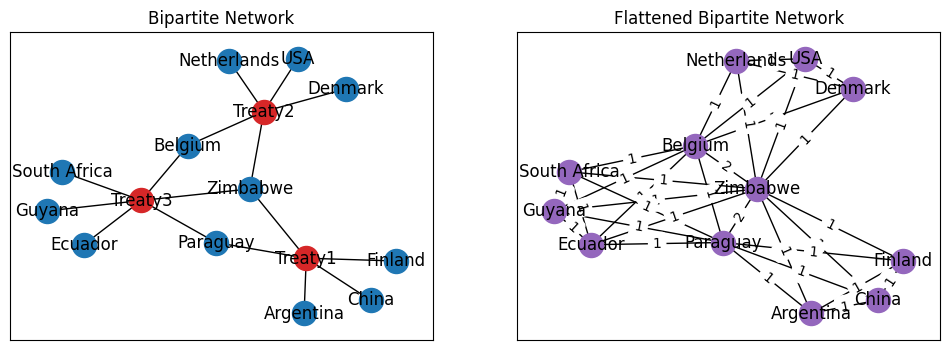

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

pos = nx.spring_layout(g_treaties, seed=123)
nx.draw_networkx_nodes(g_treaties, pos=pos, nodelist= states, node_color='tab:blue', ax=ax[0])
nx.draw_networkx_nodes(g_treaties, pos=pos, nodelist= treaties, node_color='tab:red', ax=ax[0])
nx.draw_networkx_edges(g_treaties, pos=pos, ax=ax[0])
nx.draw_networkx_labels(g_treaties, pos=pos, ax=ax[0]);

edgelabels = {(e,w):list(g_treaties_flat.get_edge_data(e,w).values())[0] for e,w in g_treaties_flat.edges}
pos = nx.spring_layout(g_treaties, seed =123)
nx.draw_networkx_nodes(g_treaties_flat, pos=pos, node_color="tab:purple", ax=ax[1])
nx.draw_networkx_edges(g_treaties_flat, pos=pos, ax=ax[1])
nx.draw_networkx_labels(g_treaties_flat, pos=pos, ax=ax[1]);
nx.draw_networkx_edge_labels(g_treaties_flat, pos, edge_labels=edgelabels, ax=ax[1]);
ax[0].set_title("Bipartite Network")
ax[1].set_title("Flattened Bipartite Network")

## 5.5 Subgraphs

A graph can be broken down into subgraphs, which have the same (trivially) or less nodes than the original graph. This can be done by specifying the nodes you want to select. Here, for example, we  take the 'tail' out of the kite, by not including nodes 7, 8, and 9 in the subgraph.

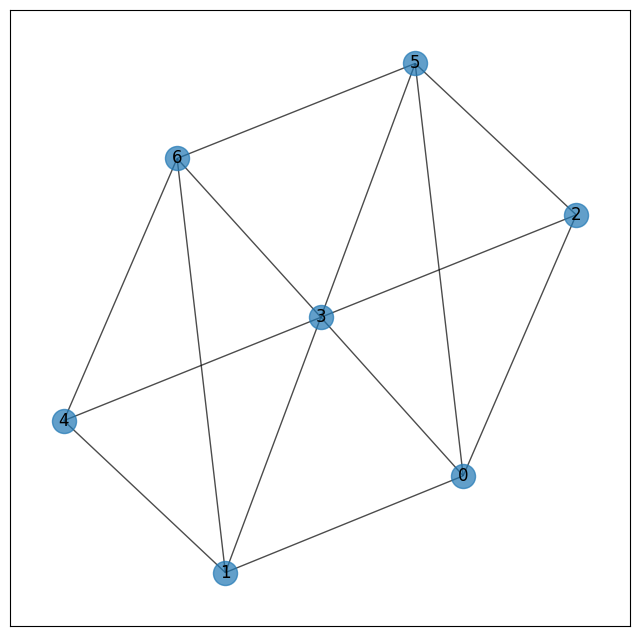

In [30]:
g_kite = nx.krackhardt_kite_graph()
g_subkite = g_kite.subgraph([0,1,2,3,4,5,6])
draw_spring(g_subkite)

The kitegraph is a rather small graph and intuitive to interpret when visualized. The drone legislation network is a larger one.

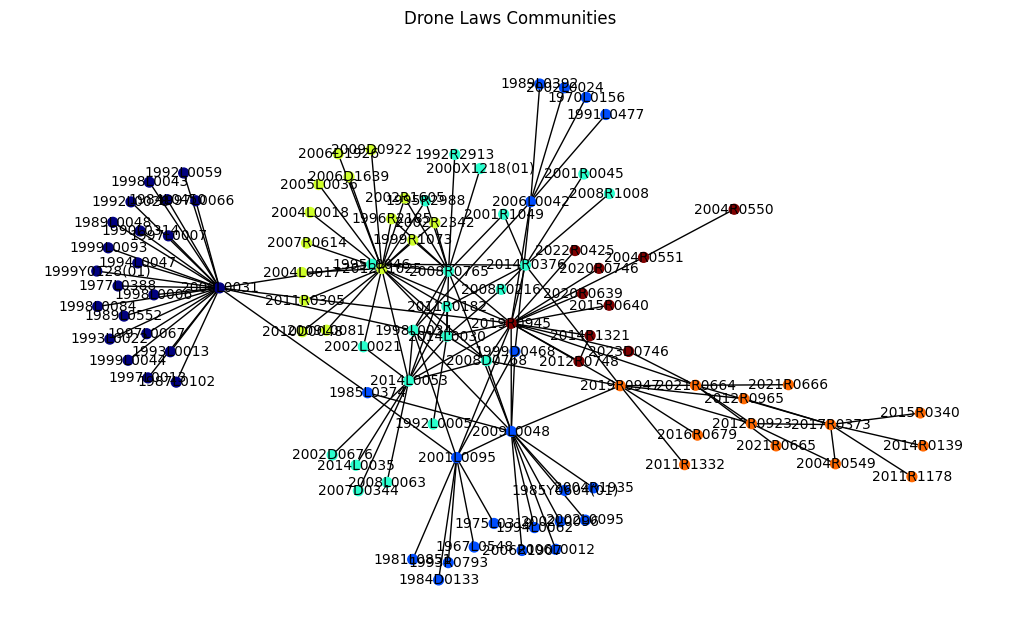

In [12]:
# Load the JSON data
with open("data/drone_laws/g_dronelaws_2.json") as f:
    data = json.load(f)
# Create a directed graph from the data
g_dag = nx.DiGraph()
# Add nodes
for node in data['nodes']:
    g_dag.add_node(node['id'])
# Add edges
for link in data['links']:
    g_dag.add_edge(link['source'], link['target'])
# Convert to undirected graph for community detection
g_undirected = g_dag.to_undirected()
# Detect communities using the greedy modularity method
communities = community.greedy_modularity_communities(g_undirected)
# Create a color map for the communities
color_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = i
# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(g_undirected)  # positions for all nodes
# Draw nodes with colors based on their community
node_colors = [color_map[node] for node in g_undirected.nodes()]
nx.draw(g_undirected, pos, with_labels=True, node_color=node_colors, 
        node_size=50, font_size=10, cmap=plt.cm.jet)
# Show the plot
plt.title("Drone Laws Communities")
plt.show()

One way of making the network more comprehensible, is to create a sub-network. Here, we create and plot a sub-network of cases that have a degree score of at least 5, meaning that the nodes have 5 or more citations (counting both incoming and outgoing citations). The network becomes much smaller now.

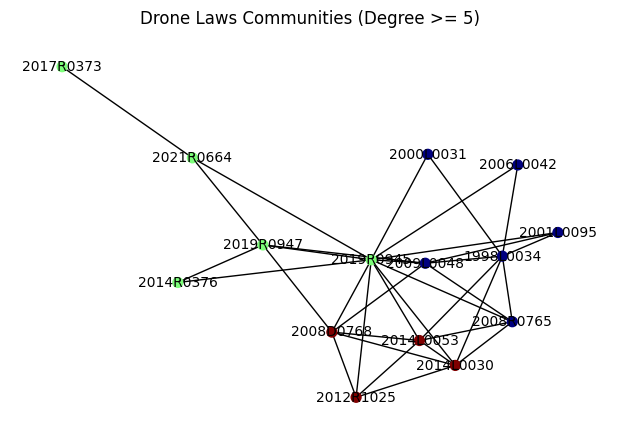

In [18]:
# Load the JSON data
with open("data/drone_laws/g_dronelaws_2.json") as f:
    data = json.load(f)

# Create a directed graph from the data
g_dag = nx.DiGraph()

# Add nodes
for node in data['nodes']:
    g_dag.add_node(node['id'])

# Add edges
for link in data['links']:
    g_dag.add_edge(link['source'], link['target'])

# Filter nodes with degree 5 or higher
high_degree_nodes = [node for node, degree in dict(g_dag.degree()).items() if degree >= 5]
g_dag_filtered = g_dag.subgraph(high_degree_nodes).copy()

# Convert to undirected graph for community detection
g_undirected_filtered = g_dag_filtered.to_undirected()

# Detect communities using the greedy modularity method
communities = community.greedy_modularity_communities(g_undirected_filtered)

# Create a color map for the communities
color_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = i

# Draw the graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(g_undirected_filtered)  # positions for all nodes

# Draw nodes with colors based on their community
node_colors = [color_map[node] for node in g_undirected_filtered.nodes()]
nx.draw(g_undirected_filtered, pos, with_labels=True, node_color=node_colors, 
        node_size=50, font_size=10, cmap=plt.cm.jet)

# Show the plot
plt.title("Drone Laws Communities (Degree >= 5)")
plt.show()


Here, the remaining nodes are still connected in the reduced network. It can, and often does, also happen that some nodes become disconnected from the other nodes in the subgraph. This occurs because the subgraph function completely removes the unselected nodes. When such nodes are removed, it is to be expected that the degree values of the nodes in the sub-network also decreases. If some nodes were only connected to unselected nodes they will now appear alone having a degree of 0 in the subgraph.

## 5.6 Network Metadata

Networks can store more than just connections between nodes and edges. The nodes and the edges can have attributes. We have already encountered one of such attributes, which is the 'weight' attribute on an edge. Accessing such information we can query the network and visualize sub-networks that meet specific criteria. 

Let us first query edge weights using the distances network that already has weights.

In [20]:
g_distances = load_graph_from_json("data/g_distances.json")
list(g_distances.edges(data="weight"))[0:5]

[(' MEDVEDYEV AND OTHERS v. FRANCE',
  ' AL-SKEINI AND OTHERS V. THE UNITED KINGDOM',
  0.28813614712778907),
 (' MEDVEDYEV AND OTHERS v. FRANCE',
  'CASE OF HIRSI JAMAA AND OTHERS v. ITALY',
  0.7988611356881962),
 (' MEDVEDYEV AND OTHERS v. FRANCE',
  ' H.F. AND OTHERS v. FRANCE',
  0.3100084370385994),
 (' MEDVEDYEV AND OTHERS v. FRANCE',
  ' SANCHEZ-SANCHEZ v. THE UNITED KINGDOM',
  0.8203609569556498),
 (' MEDVEDYEV AND OTHERS v. FRANCE',
  ' MARKOVIC AND OTHERS v. ITALY',
  0.9185916491668258)]

We can then filter out the nodes or edges that satisfy a certain edge-weight condition. This is something we already did above with our text similarity leaving only edges that have a weight that is higher than one standard deviation above the mean.

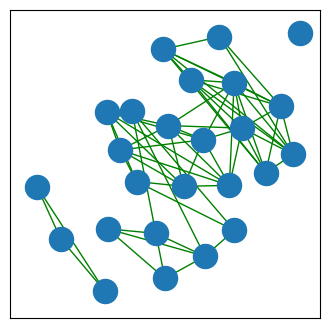

In [22]:
mean_simil = np.mean([z for x,y,z in g_distances.edges.data("weight")])
std_mimil = np.std([z for x,y,z in g_distances.edges.data("weight")])
plt.figure(figsize=(4,4))
pos = nx.spring_layout(g_distances, seed=121)
nx.draw_networkx_nodes(g_distances, pos)
lowweight = [e for e in g_distances.edges if g_distances.edges[e]['weight'] < mean_simil+std_mimil]
highweight = [e for e in g_distances.edges if g_distances.edges[e]['weight'] > mean_simil+std_mimil]
nx.draw_networkx_edges(g_distances, edgelist=highweight, pos=pos, edge_color='green')

Graphs can include other metadata than edge weights as well. The best way to encode such information is directly in the file format that generates the graph. One example is JSON, as this puts very little limits on what you can add as additional information and be edited manually or through code. 

In a legal history network aimed at [finding the references made by the lawyers to Roman and customary law when arguing their case](https://brill.com/view/journals/lega/90/1-2/article-p250_9.xml), we can observe nodes that have a 'type' designator in addition to the normal node id and edge information. For more detail on JSON see appendix 1.

In [25]:
g_lh = load_graph_from_json("data/g_lh.json")

In [26]:
resdict = dict(g_lh.nodes(data="type"))
pd.DataFrame({'nodes':resdict.keys(), "values":resdict.values()})

,nodes,values
0,R16545,Case law
1,R16556,Case law
2,C10099,Basic source
3,C10415,Basic source
4,C10705,Basic source
5,RRC4123,Roman law
6,RLMech777,Customary law
7,RLMech7781,Customary law
8,RLMech7782,Customary law
9,RLZutph1,Customary law


You can find a plot of this network below, created with [Gephi](https://gephi.org):

![image](images/ch2/legal_history.jpg)

The support of an arbitrary range of metadata is an advantage of working with networkx. With some data wrangling, metadata and network metrics can be put side-by-side in a DataFrame format.

In [27]:
res = nx.degree_centrality(g_lh)
type = [x[1] for x in g_lh.nodes(data="type")]
resdf = pd.DataFrame({"nodes":res.keys(), "centrality":res.values(), "type":type})
resdf

,nodes,centrality,type
0,R16545,0.034483,Case law
1,R16556,0.068966,Case law
2,C10099,0.827586,Basic source
3,C10415,0.482759,Basic source
4,C10705,0.137931,Basic source
5,RRC4123,0.068966,Roman law
6,RLMech777,0.068966,Customary law
7,RLMech7781,0.034483,Customary law
8,RLMech7782,0.034483,Customary law
9,RLZutph1,0.034483,Customary law


We can furhter analyze the data, for instance by comparing the centrality scores for Roman Law and Customary Law, as can be seen below.

In [29]:
grouped = resdf.groupby("type")['centrality'].mean()
grouped

type
Basic source     0.482759
Case law         0.051724
Customary law    0.055172
Roman law        0.043678
Name: centrality, dtype: float64

Text(0.5, 0.98, 'Mean centrality scores across legal history source types')

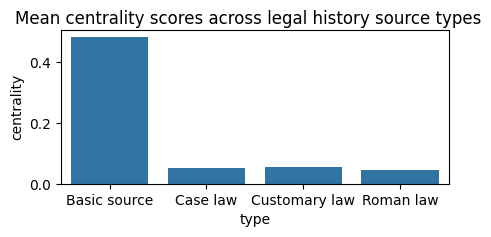

In [42]:
plt.figure(figsize=(5,2))
sns.barplot(x = grouped.index, y = grouped)
plt.suptitle("Mean centrality scores across legal history source types")